# Doggos vs Cattos

### Computer Vision

### Project: Build a Neural Network classifier that will classify pictures of dogs and cats.
_**Doggos vs Cattos**_ is a machine learning project focused on researching how diffrent learning algorithms perform in terms of classification RGB images and what kind of information can be mined using them.

### Load data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dogs_vs_cats import data_utils

plt.rcParams['figure.figsize'] = (7.0, 7.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some magic so that the notebook will reload external python modules
%load_ext autoreload
%autoreload 2

Check if tensorflow works with GPU

In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from dogs_vs_cats import extract_data

img_width = 150
img_height = 150
channels = 3

train_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(extract_data.TRAIN_DATA_PATH,
                                              target_size=(img_width, img_height),
                                              batch_size=20,
                                              class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = train_datagen.flow_from_directory(extract_data.VAL_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Neural network model

In [5]:
from tensorflow.keras import models, layers

neural_net = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

neural_net.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [6]:
neural_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
history = neural_net.fit(train_gen, steps_per_epoch=100,
                         epochs=45,
                         validation_data=val_gen,
                         validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/45
100/100 [==============================] - 14s 137ms/step - loss: 0.6953 - acc: 0.5110 - val_loss: 0.6858 - val_acc: 0.5800
Epoch 2/45
100/100 [==============================] - 9s 94ms/step - loss: 0.6832 - acc: 0.5485 - val_loss: 0.6840 - val_acc: 0.6110
Epoch 3/45
100/100 [==============================] - 10s 96ms/step - loss: 0.6694 - acc: 0.5825 - val_loss: 0.6960 - val_acc: 0.5460
Epoch 4/45
100/100 [==============================] - 10s 100ms/step - loss: 0.6490 - acc: 0.6175 - val_loss: 0.6178 - val_acc: 0.6610
Epoch 5/45
100/100 [==============================] - 11s 107ms/step - loss: 0.6115 - acc: 0.6515 - val_loss: 0.6118 - val_acc: 0.6690
Epoch 6/45
100/100 [==============================] - 10s 99ms/step - loss: 0.5944 - acc: 0.6860 - val_loss: 0.5678 - val_acc: 0.7230
Epoch 7/45
100/100 [==============================] - 10s 102ms/step - loss: 0.5587 - acc: 0.7095 - v

In [8]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

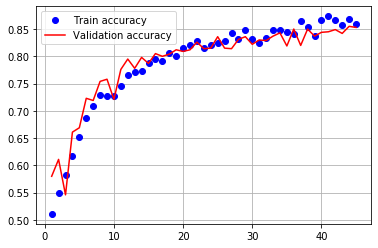

In [9]:
# Plot accuracy
train_acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = np.arange(1, 46)

plt.plot(epochs, train_acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.grid()
plt.legend(loc='best')

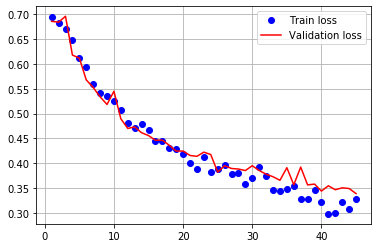

In [10]:
# Plot loss
train_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

plt.plot(epochs, train_loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.grid()
plt.legend(loc='best')

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = train_datagen.flow_from_directory(extract_data.TEST_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

test_loss, test_acc = neural_net.evaluate(test_gen, verbose=2)
print(f'Model accuracy : {test_acc}\nModel loss : {test_loss}')

Found 5000 images belonging to 2 classes.
  ...
    to  
  ['...']
250/250 - 15s - loss: 0.3510 - acc: 0.8478
Model accuracy : 0.8478000164031982
Model loss : 0.35098846101760867


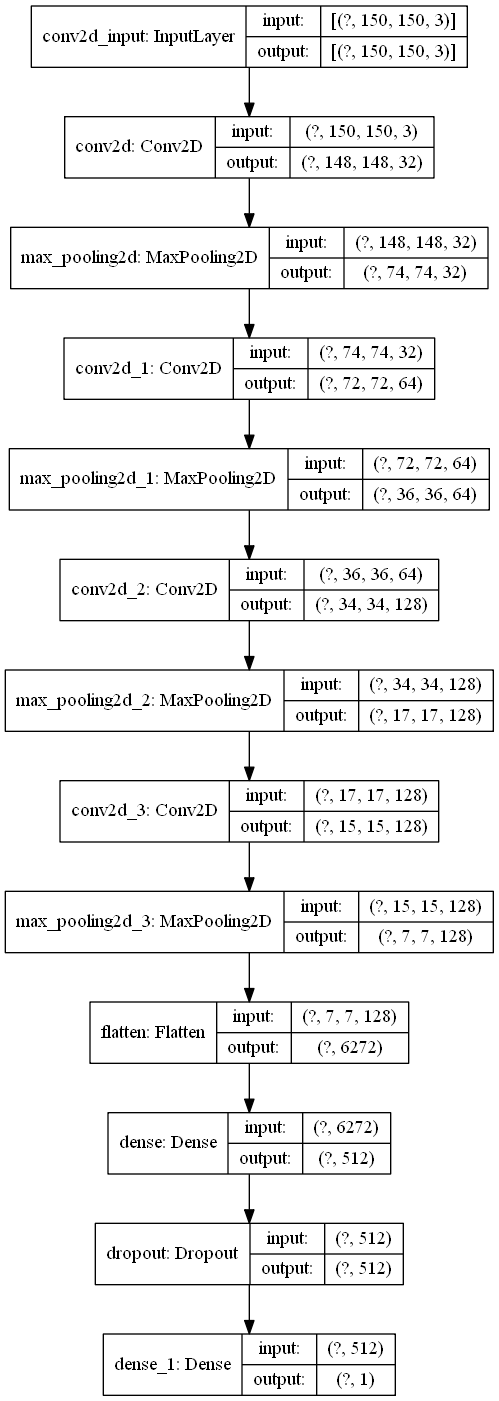

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(neural_net, show_shapes=True, show_layer_names=True)

### Transfer learning with VGG16 architecture

In [13]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) 

In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(extract_data.TRAIN_DATA_PATH,
                                              target_size=(img_width, img_height),
                                              batch_size=20,
                                              class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_gen = train_datagen.flow_from_directory(extract_data.VAL_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

conv_base.trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

In [17]:
history = model.fit(train_gen, steps_per_epoch=100, 
                    epochs=30,
                    validation_data=val_gen, validation_steps=50, 
                    verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 - 35s - loss: 0.5083 - acc: 0.7600 - val_loss: 0.4124 - val_acc: 0.8170
Epoch 2/30
100/100 - 32s - loss: 0.3670 - acc: 0.8450 - val_loss: 0.3454 - val_acc: 0.8510
Epoch 3/30
100/100 - 33s - loss: 0.3160 - acc: 0.8640 - val_loss: 0.3039 - val_acc: 0.8710
Epoch 4/30
100/100 - 32s - loss: 0.2888 - acc: 0.8805 - val_loss: 0.2842 - val_acc: 0.8840
Epoch 5/30
100/100 - 32s - loss: 0.2761 - acc: 0.8775 - val_loss: 0.2706 - val_acc: 0.8910
Epoch 6/30
100/100 - 32s - loss: 0.2662 - acc: 0.8920 - val_loss: 0.2616 - val_acc: 0.8940
Epoch 7/30
100/100 - 33s - loss: 0.2460 - acc: 0.8990 - val_loss: 0.2498 - val_acc: 0.9000
Epoch 8/30
100/100 - 33s - loss: 0.2236 - acc: 0.9190 - val_loss: 0.2469 - val_acc: 0.9000
Epoch 9/30
100/100 - 33s - loss: 0.2488 - acc: 0.8935 - val_loss: 0.2535 - val_acc: 0.8940
Epoch 10/30
100/100 - 32s - loss: 0.2330 - acc: 0.8950 - val_loss: 0.2348 - val_acc: 0.9

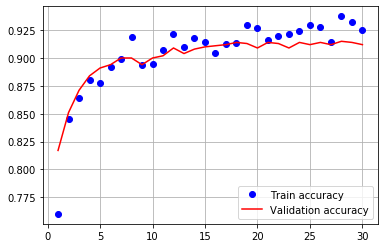

In [18]:
hist_dict = history.history
train_acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = np.arange(1, 31)

plt.plot(epochs, train_acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.grid()
plt.legend(loc='best')

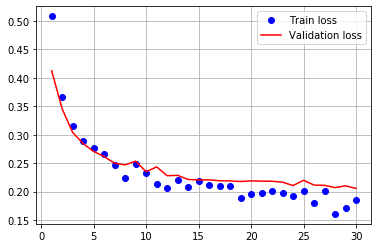

In [19]:
train_loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

plt.plot(epochs, train_loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.grid()
plt.legend(loc='best')

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = train_datagen.flow_from_directory(extract_data.TEST_DATA_PATH,
                                            target_size=(img_width, img_height),
                                            batch_size=20,
                                            class_mode='binary')

test_loss, test_acc = model.evaluate(test_gen, verbose=2)
print(f'Model accuracy : {test_acc}\nModel loss : {test_loss}')

Found 5000 images belonging to 2 classes.
  ...
    to  
  ['...']
250/250 - 53s - loss: 0.2193 - acc: 0.9096
Model accuracy : 0.909600019454956
Model loss : 0.21933195009827613


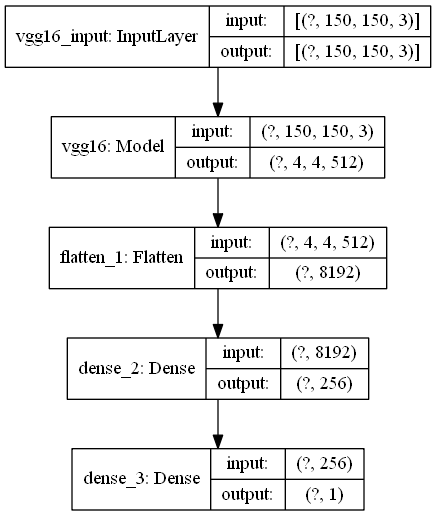

In [21]:
plot_model(model, show_shapes=True, show_layer_names=True)